In [ ]:
# matplotlib 설정
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np

%matplotlib inline

# mac OS 에서 한글이 깨진다면 참고.
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# t-SNE

## 1) 데이터 로드 및 확인

손으로 쓴 숫자들로 이루어진 데이터셋으로 1797개의 8x8 픽셀 이미지에 대한 데이터를 가지고 있다.  
숫자가 어떤 숫자인지 알려주는 각 이미지에 관한 라벨을 포함하고 있어 분류모델에서 많이 사용되는 데이터셋이다.


- feature : 각 손글씨 이미지의 픽셀별 data
- target : 이미지가 나타내는 숫자

참고 : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

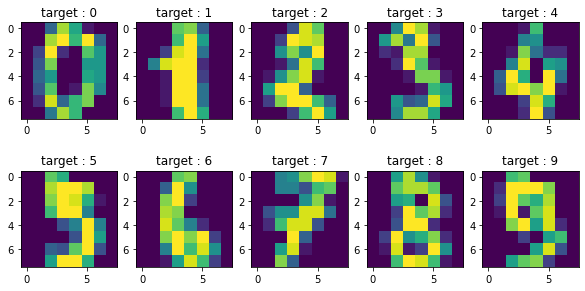

In [ ]:
# 손글씨 이미지를 불러와 확인해보자
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, img, label in zip(axes.ravel(), digits.images, digits.target):
    ax.imshow(img)
    ax.set_title(f'target : {label}')

## 2) 모델링

t-SNE (t-distributed stochatstic neighbor embedding)
* 주요 parameter:
 - `n_components` : 임베딩 할 차원의 수, 기본값은 2
 - `perplexity` : 학습에 영향을 주는 이웃하는 점의 개수를 설정, 기본값은 30
 - `metric` : 점 간의 거리척도를 구하는 방식을 설정, 기본값은 'euclidean'
 - `method` : t-SNE 의 최적화 함수, 기본값은 'barnes_hut'
        'barnes_hut' 방법은 계산의 복잡도를 O(N^2)에서 O(NlogN)으로 줄인 방법이다.
        'exact'는 정확한 계산을 할 수 있지만 느리므로 대량의 데이터에 대해서는 적합하지 않다.

참고 : https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

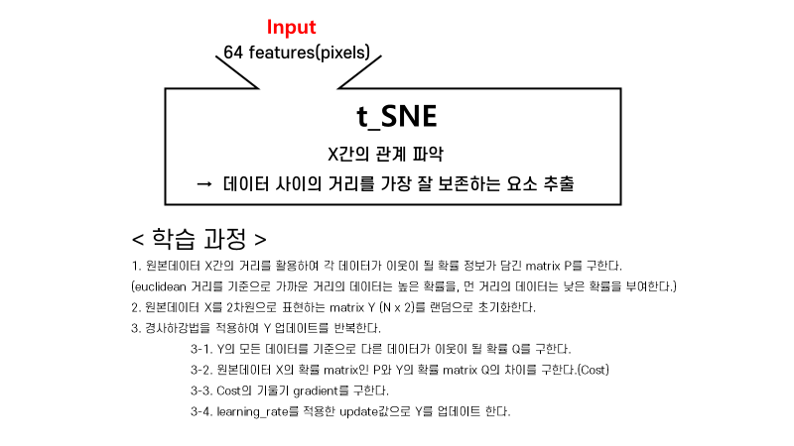

t-SNE는 주로 높은 차원의 데이터를 시각화하기 위해 사용한다.  
따라서, 3개 이상의 특성을 뽑는 경우가 거의 없으며 지도 학습용보다는 데이터 탐색을 위주로 사용한다.

t-SNE의 목적은 데이터 포인트 사이의 거리를 가장 잘 보존하는(데이터를 잘 구분하는) 2차원 표현을 찾는 것이다.  
t-SNE를 사용하면 원본 데이터 공간(높은 차원)에서 비슷한 데이터는 낮은 차원의 공간에서 가깝게 위치하며, 비슷하지 않은 데이터 구조는 멀리 떨어져 위치하게 된다.

- t-SNE는 사이킷런의 manifold에서 import할 수 있다.

In [ ]:
# t-SNE는 사이킷런의 manifold에서 import 할 수 있다.
from sklearn.manifold import TSNE

model = TSNE()
model

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)